# 1. Jeux de données 

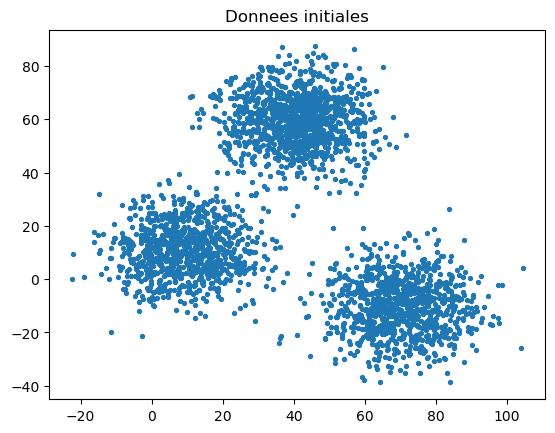

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import arff 

#Parser un fichier de donnees au format arff
#data est un tableau d'exemples avec pour chacun
#la liste des valeurs des features 
#
#Dans les jeux de donnees consideres : 
# il y a 2 features (dimension 2)
#Ex : [[-0.499261,]-0.0612356],
#      [-1.51369, 0.265446],
#      [-1.60321, 0.362039],....
#      ]
#
#Nolte : chauqe exemple du jeu de donnees contient aussi un 
#numero de cluster. On retire cette information

path='./artificial/'
databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]

#Affichage en 2D
#Extraire chaque valeur de features pour en faire une liste
#Ex pour f0 = [-0.499261, -1.51369, -1.60321, ...]
#Ex pour f0 = [-0.0612356, 0.265446, 0.362039, ...]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0, f1, s=8) #s= : taille des points sur le graphique
plt.title("Donnees initiales")
plt.show()

# 2. Clustering k-Means et k-Medoids

## 2.1 Pour démarrer

Appel KMeans pour une valeur fixee de k


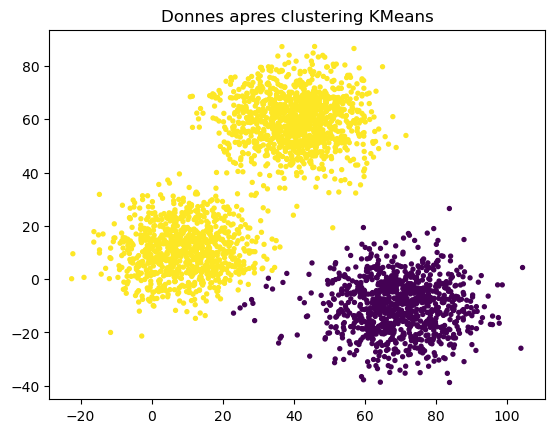

nb clusters = 2 , nb iter = 7 , runtime =  35.35 ms


In [18]:
import time 

from sklearn import cluster 

#Les donnes sont dans datanp (2 dimensions)
#f0 : vaeurs sur le premiere dimension
#f1 : valeurs sur la deuxieme dimension

print("Appel KMeans pour une valeur fixee de k")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++')
model.fit(data)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnes apres clustering KMeans")
plt.show()
print("nb clusters =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

## 2.2 Intérêts de la méthode k-Means  

indice de DB : 1.1836483236115156
indice de silhouette : 0.3552111276376862


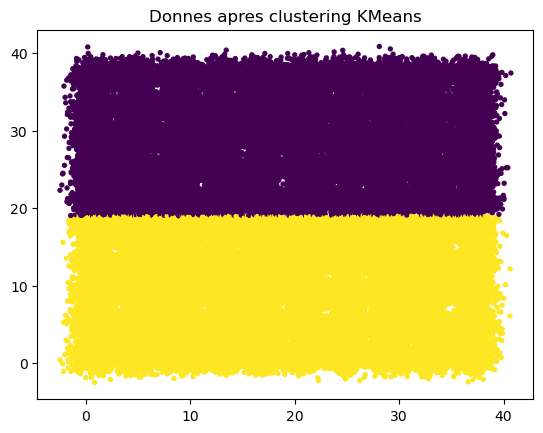

nb iter = 5 , runtime =  173.69 ms


In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances

#load un dataset
databrut2 = arff.loadarff(open(path+"birch-rg1.arff", 'r'))
data2 = [[x[0],x[1]] for x in databrut2[0]]

X = data2
f0 = [f[0] for f in data2]
f1 = [f[1] for f in data2]

tps1 = time.time()
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)
tps2 = time.time()
labels = kmeans.labels_
iteration = kmeans.n_iter_

sil=metrics.silhouette_score(X, labels, metric='euclidean')

#Calcul de l'indice de Davies_Bouldin
print("indice de DB :", davies_bouldin_score(X, labels))
print("indice de silhouette :", sil)


plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnes apres clustering KMeans")
plt.show()
print("nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

In [103]:
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

tps1 = time.time()
k=3
distmatrix = euclidean_distances(data2)
fp = kmedoids.fasterpam(distmatrix, k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels
print("Loss with FasterPam:", fp.loss)

plt.scatter(f0, f1, c=labels_kmed, s=8)
plt.title("Donnees apres clustering KMedoids")
plt.show()
print("nb cluster =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

ModuleNotFoundError: No module named 'KMedoids'